<img src="images/charmeleon.png" alt="Adept" width="200">

# Frequency filtering and cutting epochs

Welcome to the next level!
In the previous level, you have learned some programming basics, culminating in you successfully visualizing some continuous EEG data.
Now, we're going to use some more functions of the [MNE-Python](https://martinos.org/mne) module to perform frequency filtering and cutting up the signal into epochs.

## The experiment

The EEG data was recorded while a brave volunteer was sitting in front of a computer screen, looking at pictures of playing cards.

<center>
    <img src="images/sound.png" width="100" style="display: inline; margin-right: 50px">
    <img src="images/checkerboard.png" width="100" style="display: inline; margin-right: 50px">
    <img src="images/cross.png" width="100" style="display: inline; margin-right: 50px">
    <img src="images/checkerboard.png" width="100" style="display: inline; margin-right: 50px">
    <img src="images/sound.png" width="100" style="display: inline; transform: scaleX(-1);">
</center>

By analyzing the MEG signal, we should be able to see the activity in the auditory and visual cortices, perhaps even see a difference whether the stimulus was presented on the left or on the right side.

## Loading the data

Below is some code that will load the EEG data.
It should look familiar to you if you have completed the last level.
However, I've added a bit. Can you spot what I have added?

In [2]:
from mne.io import read_raw_bdf
raw = read_raw_bdf('data/magic-trick-raw.bdf', preload=True)
print(raw)

Extracting EDF parameters from /m/home/home4/45/vanvlm1/data/projects/neuroscience_tutorials/eeg-erp/data/magic-trick-raw.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 92999  =      0.000 ...    92.999 secs...
<RawEDF | magic-trick-raw.bdf, 9 x 93000 (93.0 s), ~6.4 MB, data loaded>


## Dissecting the program above

The first line of the program above imports the [`read_raw_bdf`](https://www.martinos.org/mne/stable/generated/mne.io.read_raw_bdf.html) function from the `mne.io` module.

The second line of the program is the most complicated. A lot of stuff is going on there:

<img src="images/function_call_explanation.png">

The [`read_raw_bdf`](https://www.martinos.org/mne/stable/generated/mne.io.read_raw_bdf.html) function is called with two parameters. The first parameter is a piece of text (a "string") containing the name of the BDF file to load. Literal text (strings) must always be enclosed in `'` quotes. The second parameter is a "named" parameter, which is something I added since last level. We will use named parameters a lot during this session (see below). This parameter is set to the special value `True`. Python has three special values: `True`, `False`, and `None`, which are often used to indicate "yes", "no", and "I don't know/care" respectively. Finally, the result is stored in a variable called `raw`.

The last line of the program calls the [`print`](https://docs.python.org/3/library/functions.html#print) function, which is used to display things. Here, it is called with the `raw` variable as parameter, so it displays the data contained in this variable, namely the data we loaded with [`read_raw_bdf`](https://www.martinos.org/mne/stable/generated/mne.io.read_raw_bdf.html).

## Named parameters

Many functions of MNE-Python take dozens of parameters that fine-tune exactly how to perform some operation. If you had to specify them all every time you want to call a function, you'd spend ages worrying about little details and get nothing done. Luckily, Python allows us to specify default values for parameters, which means these parameter may be omitted when calling a function to use the default. In MNE-Python, most parameters have a default value, so while a function may have 20 parameters, you only have to specify one or two. The rest of the parameters are like little knobs and buttons you can use to fine tune things, or just leave alone. This allows MNE-Python to keep simple things simple, while making complicated things possible.

Parameters with default values are called "named" parameters, and you specify them with `name=value`. The `preload` parameter that you saw in the program above is such a named parameter. It controls whether to load all of the data in memory, or only read the "metadata" of the file, i.e., when it was recorded, how long it is, how many sensors the MEG machine had, etc. By default, `preload=False`, meaning only the metadata is read. In the example above, we set it to `True`, indicating we wish to really load all the data in memory.

## Visualizing the data

As we have seen in the last level, raw data can be visualized (or "plotted") by the [`plot_raw`](https://www.martinos.org/mne/stable/generated/mne.viz.plot_raw.html) function that is kept inside the `mne.viz` module. It needs one parameter: the variable containing the data you wish to plot. (It also has a lot of named parameters, but you can leave them alone for now.)

I'm going to let you write the visualization code, but first, there is a little housekeeping that we need to do. We need to tell the visualization engine to send the results to your browser and not attempt to open a window on the server where this code is running. Please run the cell below:

In [3]:
%matplotlib notebook
print('From now on, all graphics will send to your browser.')

From now on, all graphics will send to your browser.


Now, it's your turn! Write the Python code that will visualize the raw EEG data we just loaded.
Keep the following things in mind:
 1. The function is called [`plot_raw`](https://www.martinos.org/mne/stable/generated/mne.viz.plot_raw.html) and is kept inside the `mne.viz` module. Remember to `import` to function first!
 2. Call the function with one parameter, namely the `raw` variable we created above that contains the MEG data.
 3. Assign the result of the [`plot_raw`](https://www.martinos.org/mne/stable/generated/mne.viz.plot_raw.html) function to a variable (pick any name you want), otherwise the figure will show twice.
 
Use the cell below to write your code:

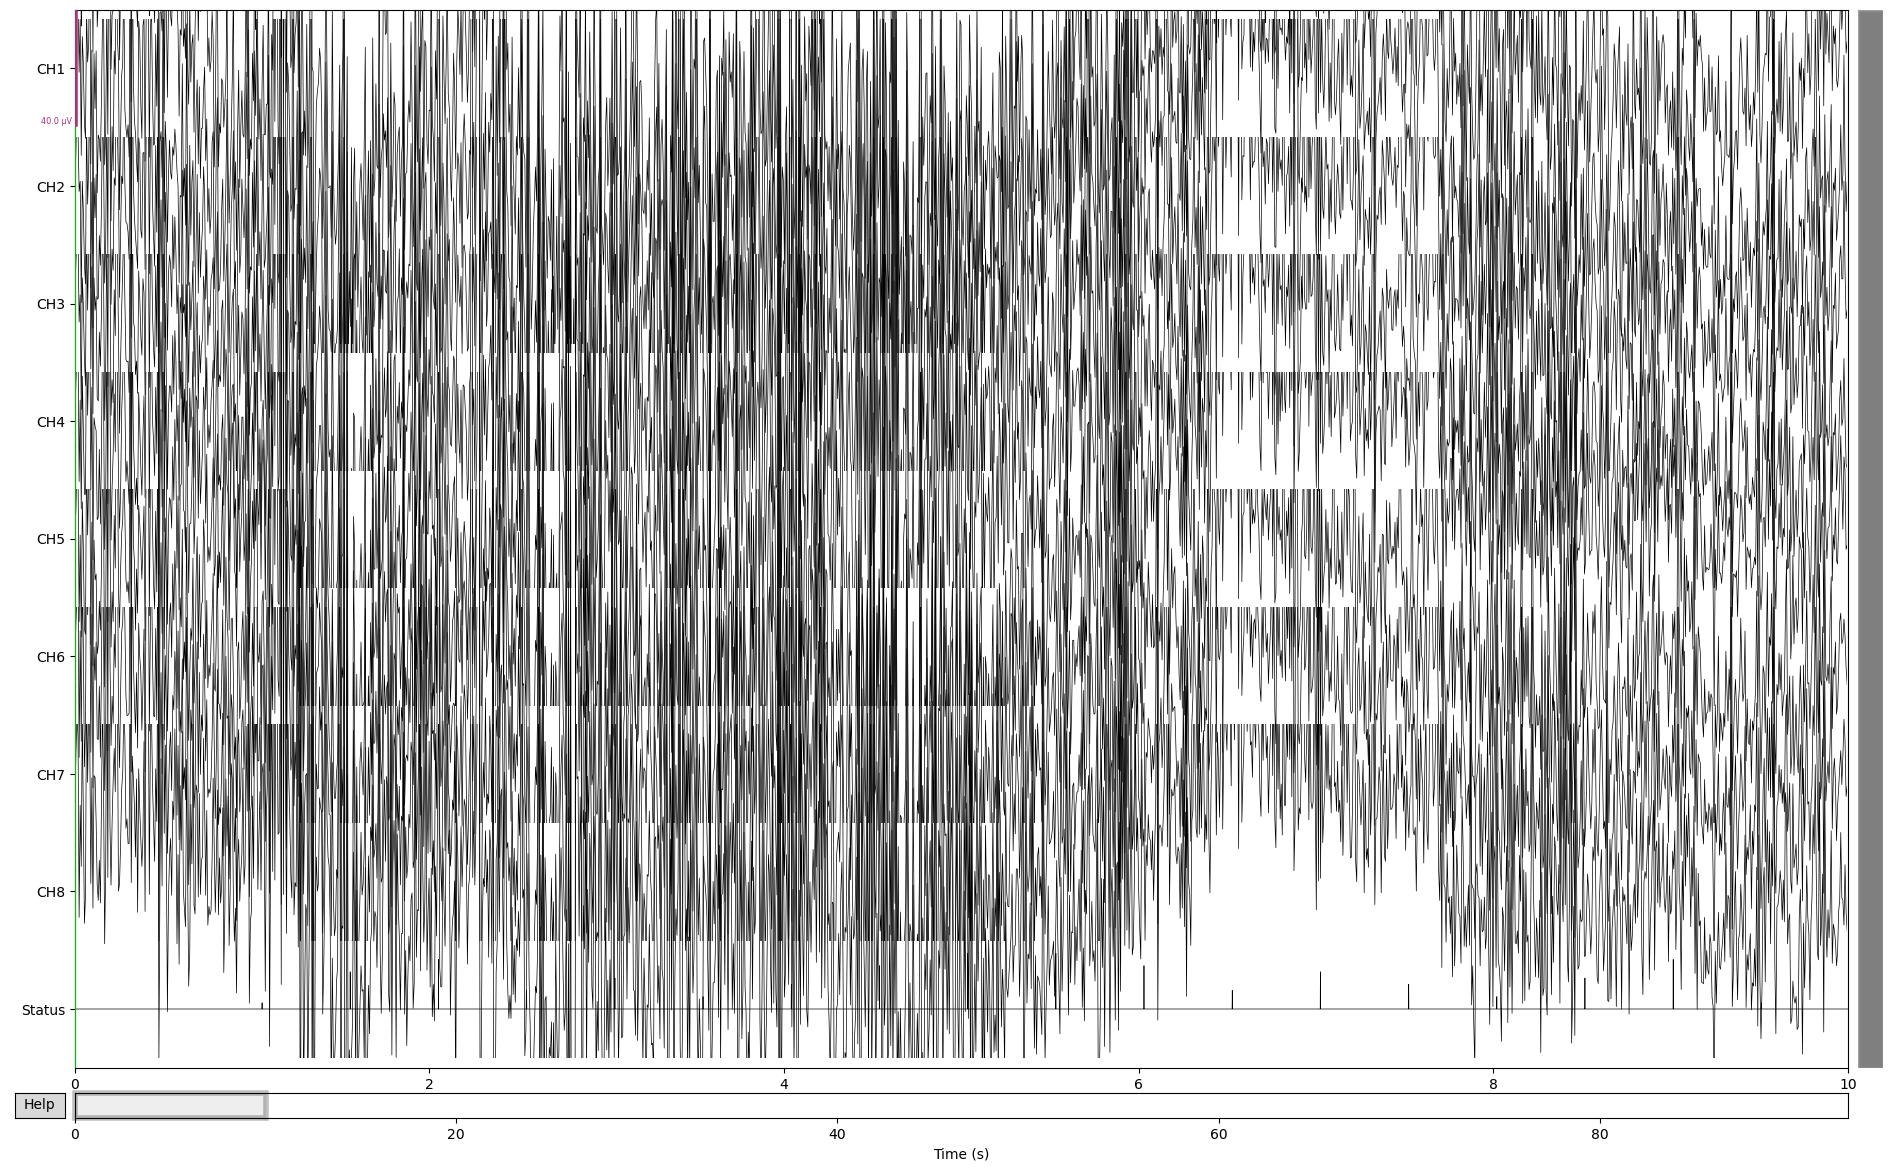

In [4]:
from mne.viz import plot_raw
plot_raw(raw)

If you wrote the code correctly, you should be looking at a little interface that shows the data collected on all the MEG sensors. Click inside the scrollbars or use the arrow keys to explore the data.

Browsing through the channels, you will notice there are two channel types:

 * 8 EEG sensors, named CH1-CH8
 * 1 STIM channel, named Status
 
Let's take a look at the STIM channel.

In [7]:
raw.filter(0.5, 20)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 6601 samples (6.601 sec)



<RawEDF | magic-trick-raw.bdf, 9 x 93000 (93.0 s), ~6.4 MB, data loaded>

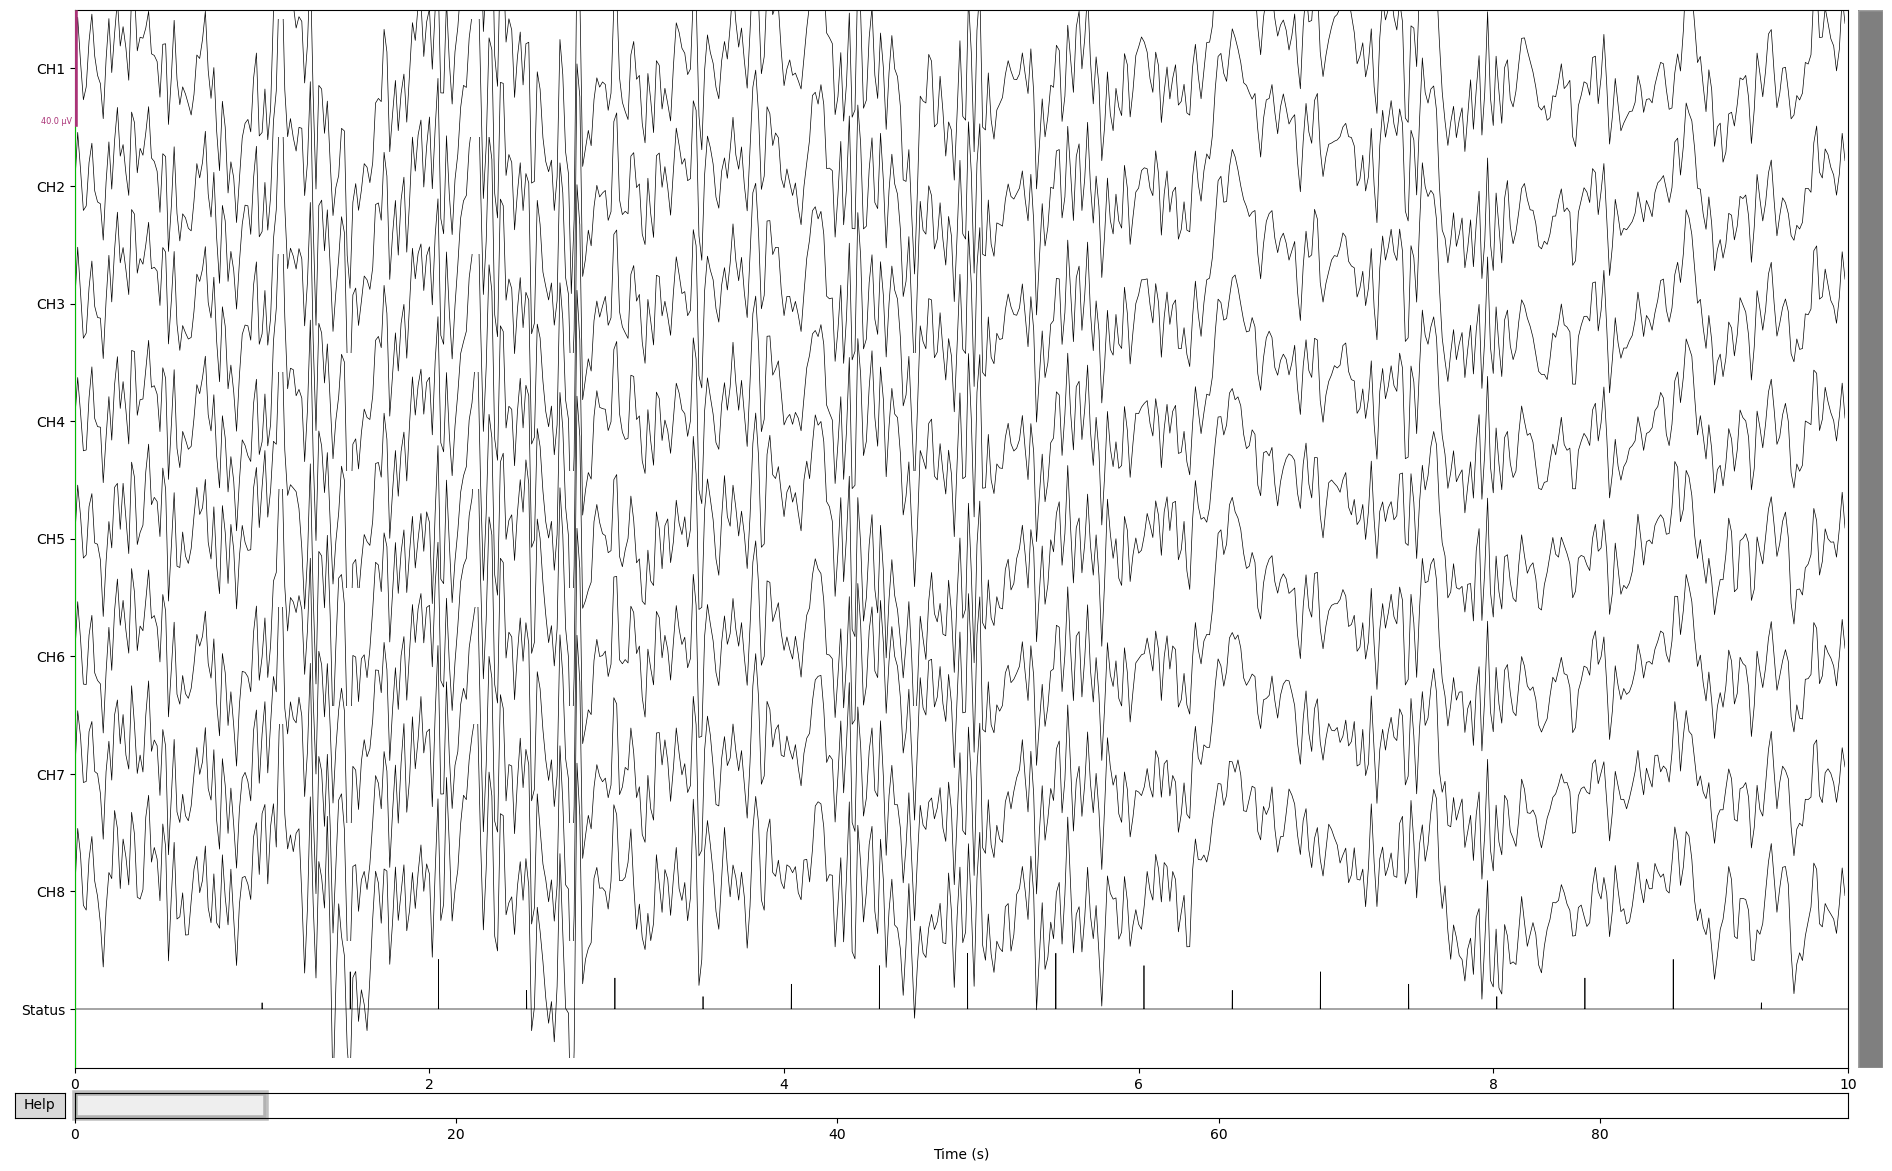

In [8]:
raw.plot()

## Events, and how to read the documentation

In the figure you just made, take a close look at the channel named "Status".
On this channel, the computer that is presenting the stimuli was sending timing information to the MEG equipment.
Whenever a stimulus (one of the 9 playing cards) was presented, the signal at this channel jumps briefly from 0 to 1-9, indicating which playing card was being shown.

We can use this channel to create an "events" matrix: a table listing all the times a stimulus was presented, along with the time of the event and the type of stimulus.
The function to do this is called [`find_events`](https://www.martinos.org/mne/stable/generated/mne.find_events.html), and is kept inside the `mne` module.

In this document, all the function names are links to their documentation. Click on [`find_events`](https://www.martinos.org/mne/stable/generated/mne.find_events.html) to pull up its documentation. It will open a new browser tab. It should look like this:

<img src="images/doc_with_explanation.png" alt="Documentation for find_events"/>

Looking at the function "signature" reveals that many of the parameters have default values associated with them. This means these are named parameters and we can ignore them if we want. There is only a single required parameter, named `raw`. Looking at the parameter list, it seems we need to set it to the raw data we just loaded with the [`read_raw_bdf`](https://www.martinos.org/mne/stable/generated/mne.io.read_raw_bdf.html) function. If we called the function correctly, it should provide us with an "array" (don't worry about what an array is for now) with all the events.

Now, call the function and find some events! Keep the following things in mind:

 1. The function is called [`find_events`](https://www.martinos.org/mne/stable/generated/mne.find_events.html) and is kept inside the `mne` module. Remember to `import` to function first!
 2. Call the function. Use the documentation to find out what parameters it needs.
 3. Assign the result to a variable called `events`.

In [5]:
from mne import find_events
events = find_events(raw)

180 events found
Event IDs: [1 2 3 4 5 6 7 8 9]


If you called the function correctly, running the cell below should display the found events on top of the raw data. It should show as cyan lines, with a number on top indicating the type of event.
These numbers are referred to as "event codes".

In [9]:
fig = plot_raw(raw, events=events)

## Epochs, or, how to create a dictionary

<img src="images/dictionary.jpg" width="200" style="float: right; margin-left: 10px">

Now that we have the information on what stimulus was presented at one time, we can extract "epochs". Epochs are little snippets of signal surrounding an event. These epochs can then be averaged to produce the "evoked" signal.

In order to create epochs, we need a way to translate the event codes (1, 2, 3, ...) into something more descriptive.
This can be done using a new type of variable called a ["dictionary"](https://docs.python.org/2/tutorial/datastructures.html#dictionaries).
A Python dictionary, allows us (or rather the computer) to "look things up".
The following piece of code creates a dictionary called `event_id`. Take a look and run it:

In [11]:
event_id = { 'Ace of spades': 1, 'Jack of clubs': 2, 'Queen of hearts': 3, 'King of diamonds': 4, '10 of spades': 5, '3 of clubs': 6, '10 of hearts': 7, '3 of diamonds': 8, 'King of spades': 9 }

A dictionary is created by using curly braces `{ }` and colons `:`. I've spread out the code over multiple lines to make things a little clearer. The way you create a dictionary is to say `{this: means that}` and you use commas if you want to put more than one thing in the dictionary.

Finally, you should know that Python allows you to spread out lists across multiple lines, so we can write our dictionary like this, which is much nicer to read:

In [12]:
event_id = {
    'Ace of spades': 1,
    'Jack of clubs': 2,
    'Queen of hearts': 3,
    'King of diamonds': 4,
    '10 of spades': 5,
    '3 of clubs': 6,
    '10 of hearts': 7,
    '3 of diamonds': 8,
    'King of spades': 9,
}

Armed with our `event_id` dictionary, we can move on to creating epochs.

For each event, let's cut a snippet of signal from 0.2 seconds *before* the moment the stimulus was presented, up until 0.5 seconds *after* it was presented. If we take the moment the stimulus was presented as time 0, we will cut epochs from -0.2 until 0.5 seconds.

The function to do this is called [`Epochs`](https://www.martinos.org/mne/stable/generated/mne.Epochs.html) (with a capital E).
Click on the function name to open its documentation and look at the parameters it needs.

<div style="margin-left: 50px; margin-top: 1ex"><img src="images/OMG.png" width="20" style="display: inline"> That's a lot of parameters!</div>
<div style="margin-left: 50px"><img src="images/thinking.png" width="20" style="display: inline"> Ok, how many are optional?</div>
<div style="margin-left: 50px"><img src="images/phew.png" width="20" style="display: inline"> Almost all of them, phew!</div>

Here are the points of the documentation that are most relevant to us right now:
* There are two required arguments, the `raw` data and the `events` array we created earlier.
* The next optional parameter is the `event_id` dictionary we just created.
* The next two optional parameters, `tmin` and `tmax`, specify the time range to cut epochs for. They are set to -0.2 to 0.5 seconds by default. Neat! That's exactly what we wanted. We can leave this two alone then.
* We can also leave the rest of the parameters alone.

Go ahead and `import` the [`Epochs`](https://www.martinos.org/mne/stable/generated/mne.Epochs.html) function from the `mne` module.
Then call it with the correct parameters and store the result in a variable called `epochs` (small e):

In [14]:
from mne import Epochs
epochs = Epochs(raw, events, event_id)

Not setting metadata
Not setting metadata
180 matching events found
Applying baseline correction (mode: mean)
0 projection items activated


MNE-Python has plotting functions for almost everything. The cell below will create an interactive visualization of your epochs. Click inside the scrollbars or use the arrow keys to scroll through the data.

In [15]:
from mne.viz import plot_epochs
fig = plot_epochs(epochs)

Loading data for 180 events and 701 original time points ...
0 bad epochs dropped
Loading data for 180 events and 701 original time points ...
Loading data for 20 events and 701 original time points ...


## Visualizing the evoked field, or, working with objects

Throughout this exercise, we have created many variables: `raw`, `events`, `event_id`, and `epochs`.
Up to now, we've treated these as simple boxes that hold some data, or rather "objects" as they are called in Python.
However, the box/object metaphor is not really a good one.
Variables are more like little machines of their own.
They can do things!

Take for example our `event_id` dictionary.
We can look things up in it.
You do this using square brackets `[ ]`. (Python uses many different kinds of brackets!)
For example, to look up the event code for the event `'visual/left'`, you would write:

```python
event_id['visual/left']
```

Try it! Get the event code for the event `'audio/right'` (should be 2):

Both the `raw` and the `epochs` variables are very powerful objects.
If you want, you can look at the documentation for [Raw](https://www.martinos.org/mne/stable/generated/mne.io.Raw.htm) and [Epochs](https://www.martinos.org/mne/stable/generated/mne.Epochs.html) to see the long list of things they can do.

A very useful thing that `epochs` does is behave like a dictionary: you can look up stuff in it.
More precisely, we can select all the epochs corresponding to a certain type of event by using the square backets `[ ]`.
For example, to select all the epochs in which a checkerboard was shown in the left visual field of the volunteer, we would write:

```python
epochs['visual/left']
```

Another useful thing is that both `raw` and `epochs` objects know how to visualize (i.e. "plot") themselves.
You already know that modules hold functions, but objects can hold functions too.
Functions that are kept inside objects are called "methods", to distinguish them from "functions" that are kept inside modules.

Instead of using the [`plot_raw`](https://www.martinos.org/mne/stable/generated/mne.viz.plot_raw.html) and [`plot_epochs`](https://www.martinos.org/mne/stable/generated/mne.viz.plot_epochs.html) functions, we can use the plotting methods of the objects, like this:

```python
fig = raw.plot()
fig = epochs.plot()
```

Notice how the `.plot()` method calls don't need any parameters: they already know which object they need to visualize, namely the object they belong to.
In MNE-Python, many objects have such a [`plot`](https://www.martinos.org/mne/stable/generated/mne.Epochs.html#mne.Epochs.plot) method.

We can string together the "lookup" functionality and the visualization functionality, like this:

```python
fig = epochs['visual/left'].plot()
```

Go ahead and try it: visualize the epochs belonging to the different stimuli.
Remember, we called them: `'audio/left'`, `'audio/right'`, `'visual/left'` and `'visual/right'`.

Let's move on from epochs to evoked fields.

As you have heard in the talks earlier today, evoked fields can be analyzed by taking all the epochs that correspond to a certain experimental condition and computing their average.
The `epochs` object provides a method named [`average`](https://www.martinos.org/mne/stable/generated/mne.Epochs.html#mne.Epochs.average) to compute, you guessed it, the average of all the epochs.
This method produces an [`Evoked`](https://www.martinos.org/mne/stable/generated/mne.Evoked.html) object that represents the evoked field.
Like most objects, it has a [`plot`](https://www.martinos.org/mne/stable/generated/mne.Evoked.html#mne.Evoked.plot) method of its own to visualize it.
For example, here's how to compute the evoked field in response to the checkerboards presented to the left visual field:

```python
evoked_visual_left = epochs['visual/left'].average()
```

Now, everything you've learned so far needs to come together.
You are given four code cells below.
In each code cell, plot the evoked field corresponding to one of the four event types, keeping the following in mind:

 * Select the epochs that correspond to the event type using the square brackets `[ ]`.
 * Either:
   * store the result in some variable and call the [`average`](https://www.martinos.org/mne/stable/generated/mne.Epochs.html#mne.Epochs.average) method of the new variable, or
   * string the square brackets together with the [`average`](https://www.martinos.org/mne/stable/generated/mne.Epochs.html#mne.Epochs.average) method like in the example.
 * Assign the result of the [`average`](https://www.martinos.org/mne/stable/generated/mne.Epochs.html#mne.Epochs.average) method, i.e. the evoked field, to a new variable (pick a good name, for example `evoked_visual_left`)
 * Use the `plot` method of the new variable containing the evoked field to visualize it. Store the result in a variable (e.g. `fig`) or the figure will show up twice.

In the visualizations you just made, all the channels are drawn on top of each other.
(This is called a "butterfly" plot.)
These visualizations are great to determine when things are happening.
Around 0.1 seconds after an auditory beep was played, we get a burst of activity.
The same is true for the checkerboards, with an additional peak at around 0.18 seconds.

## Making topographic maps

Now let's look at where these bursts of activity originate from.
However, we're not going to go all the way and perform source estimation to trace the activity back to the cortex of the brain.
You can learn how to do that in the [expert](expert.ipynb) level.
For now, we can get some rough idea by looking at which sensors are picking up most of the activity: are they at the front or the back of the head?
This question can be nicely answered by topographic maps: maps of the sensors around the head.

Making topographic maps is really easy.
Objects of the type [`Evoked`](https://www.martinos.org/mne/stable/generated/mne.Evoked.html), like the ones you have been making to create the butterfly plots, have a method called [`plot_topomap`](https://martinos.org/mne/stable/generated/mne.Evoked.html#mne.Evoked.plot_topomap). For example, try running the cell below:

In [ ]:
evoked_visual_left = epochs['visual/left'].average()
fig = evoked_visual_left.plot_topomap()

By default, [`plot_topomap`](https://martinos.org/mne/stable/generated/mne.Evoked.html#mne.Evoked.plot_topomap) draws topographic maps for 4 different points in time. It shows the head of the subject, along with the positions of all the sensors of the MEG scanner. Colors indicate the strength of the magnetic field and whether the field is exiting the head (red) or entering the head (blue). Remember from the talks you've heared today that the magnetic field is generated by a current inside the brain:

<img src="images/topomap_with_explanation.png" width="200" alt="Topomap with explanation">

If you take a look at the documention of the [`plot_topomap`](https://martinos.org/mne/stable/generated/mne.Evoked.html#mne.Evoked.plot_topomap) method, you will see that the method takes some parameters. All of them are optional, but one that is of interest to us is the first one, called `times`. This parameters lets us specify at which times we want a topographic map to be drawn. Intriguingly, we can set it to the string `'interactive'` to create an interactive plot where we can use a slider to change the time of the map.

Try plotting a topographic map, with the `times` parameter set to `'interactive'`:

Now you can plot topographic maps for all conditions and analyze the sensor data.
See if you can spot how the checkerboard activate the visual cortex at the back of the head, while the auditory beeps activate the auditory cortices at the left and right side of the head.

## Continue onward to the expert level!

Great job making it this far. You've taken some steps along the path towards becoming a data analyst. Take a look at the clock. If we still have some time, I'd like to invite you to move on to the next level.

<center>
<a href="expert.ipynb" alt="To expert level"><img src="images/charizard.png" width="200"></a>
<a href="expert.ipynb">Move on to the expert level</a>
</center>